In [1]:
import os
import pandas as pd
from typing import Optional, Sequence, Union

pd.set_option('display.max_columns', None)

from core import * 

In [8]:
df = load_data(r'D:\Documents\Python\CREATE_DATA\airline_names.xlsx')  

In [9]:
df3 = pd.DataFrame({'A':[1,2,7,None,6,9],'B':[6,2,5,1,2,9] })
profile(df3) 

ROW TOTAL = 6 COLUMNS = 2


,Variable Name,Variable Type,Missing Count,% Blank,Unique Values,Most Frequent Value,Mean,Standard Deviation,Min,25%,Median,75%,Max
0,A,float64,1,17,5,1.0,5.00,3.39,1.0,2.0,6.0,7.00,9.0
1,B,int64,0,0,5,2.0,4.17,3.06,1.0,2.0,3.5,5.75,9.0


In [4]:
#df = df[['operating_airline','published_airline']]
#df = df[['activity_period']]  
df.head() 

,operating_airline,operating_airline2
0,ATA Airlines,ATA Airlines
1,ATA Airlines,ATA Airlines
2,ATA Airlines,ATA Airlines
3,Air Canada,Air Canada
4,Air Canada,Air Canada


In [4]:
profile(df)   

ROW TOTAL = 22,869 COLUMNS = 2


,Variable Name,Variable Type,Missing Count,% Blank,Unique Values,Most Frequent Value
0,operating_airline,object,0,0,95,United Airlines
1,operating_airline2,object,4868,21,84,United Airlines - Pre 07/01/2013


In [10]:
df2 = load_data(r'D:\Documents\Python\CREATE_DATA\winemag-data_first150k.csv')

In [11]:
profile(df2)    

ROW TOTAL = 150,930 COLUMNS = 10


,Variable Name,Variable Type,Missing Count,% Blank,Unique Values,Most Frequent Value,Mean,Standard Deviation,Min,25%,Median,75%,Max
0,country,object,5,0,48,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,description,object,0,0,97821,"86-88 This could work as a rich wine, because ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,designation,object,45735,30,30620,Reserve,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,points,int64,0,0,21,87,87.89,3.22,80.0,86.0,88.0,90.0,100.0
4,price,float64,13695,9,357,20.0,33.13,36.32,4.0,16.0,24.0,40.0,2300.0
5,province,object,5,0,455,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,region_1,object,25060,17,1236,Napa Valley,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,region_2,object,89977,60,18,Central Coast,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,variety,object,0,0,632,Chardonnay,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,winery,object,0,0,14810,Williams Selyem,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
Profile testing above. 



In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from typing import Optional

def linreg_plot(
    df, 
    xvar: str, 
    yvar: str,
    xtitle:  Optional[str]   = None, 
    ytitle:  Optional[str]   = None,
    alpha:   Optional[float] = 0.8 , 
    show_r2: Optional[bool]  = True ):
    """
    Quick linear regression plot for exploratory analysis.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe.
    xvar, yvar : str
        Column names for X and Y.
    xtitle, ytitle : str, optional
        Axis titles (defaults to column names).
    alpha : float, optional
        Scatter transparency (default = 0.8).
    show_r2 : bool, optional
        Whether to print R² score in console.

    Returns
    -------
    model : sklearn.linear_model.LinearRegression
        Fitted model (for further use if needed).
    """

    # Drop rows with missing data
    data = df[[xvar, yvar]].dropna()

    x = data[[xvar]].values
    y = data[yvar].values

    model = LinearRegression().fit(x, y)
    r2 = model.score(x, y)
    m, b = model.coef_[0], model.intercept_

    if show_r2:
        print(f"R² = {r2:.3f}")

    # Predicted values
    y_pred = model.predict(x)

    # Label for regression line
    label = f"Y = {m:.3f}·X + {b:.2f} (R²={r2:.2f})"

    # Plot
    with plt.style.context("seaborn-v0_8-whitegrid"):
        plt.figure(figsize=(5.2, 4.8))
        plt.scatter(x, y, alpha=alpha, label="Data")
        plt.plot(x, y_pred, color="red", linewidth=2, label=label)
        plt.xlabel(xtitle or xvar, fontsize=13)
        plt.ylabel(ytitle or yvar, fontsize=13)
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fontsize=11, frameon=True)
        plt.tight_layout()
        plt.show()

    return model


R² = 0.202


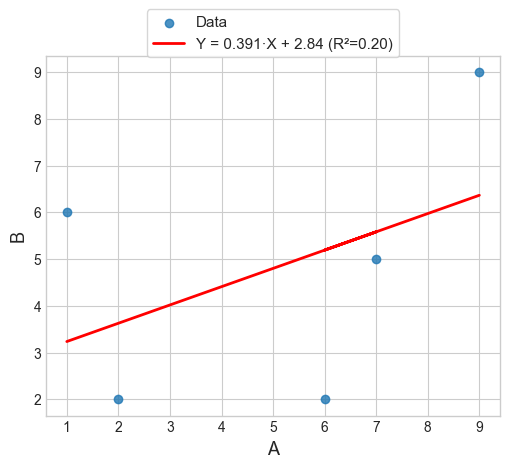

In [9]:
m = linreg_plot( df3 , "A", "B")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def lm_stats_plot(
    df: pd.DataFrame,
    xvar: str,
    yvar: str,
    xtitle: str = None,
    ytitle: str = None,
    alpha: float = 0.8,
    show_summary: bool = True
):
    """
    PURPOSE
    -------
    Fit a simple linear regression model using statsmodels and visualize the results.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe.
    xvar : str
        Independent variable (X).
    yvar : str
        Dependent variable (Y).
    xtitle, ytitle : str, optional
        Axis labels. Defaults to column names.
    alpha : float, optional
        Scatter transparency (default = 0.8).
    show_summary : bool, optional
        Whether to print the regression summary table (default = True).

    Returns
    -------
    model : statsmodels.regression.linear_model.RegressionResultsWrapper
        The fitted statsmodels OLS regression model.
    """

    # Drop missing values for the chosen variables
    data = df[[xvar, yvar]].dropna()

    # Independent variable (add constant for intercept)
    X = sm.add_constant(data[xvar])
    y = data[yvar]

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Optionally print full regression summary
    if show_summary:
        print(model.summary())

    # Extract regression line
    x_vals = np.linspace(data[xvar].min(), data[xvar].max(), 100)
    X_pred = sm.add_constant(x_vals)
    y_pred = model.predict(X_pred)

    # Plot
    with plt.style.context("seaborn-v0_8-whitegrid"):
        plt.figure(figsize=(5.5, 4.8))
        plt.scatter(data[xvar], data[yvar], alpha=alpha, label="Observed")
        plt.plot(x_vals, y_pred, color="red", linewidth=2, label="Fitted line")

        # Labels
        plt.xlabel(xtitle or xvar, fontsize=13)
        plt.ylabel(ytitle or yvar, fontsize=13)

        # Equation annotation
        slope = model.params[xvar]
        intercept = model.params["const"]
        r2 = model.rsquared
        eqn = f"Y = {slope:.3f}·X + {intercept:.2f} (R²={r2:.2f})"
        plt.legend([eqn], loc="upper center", bbox_to_anchor=(0.5, 1.15), fontsize=11)

        plt.tight_layout()
        plt.show()

    return model


d:\AppData\Python313\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                 -0.063
Method:                 Least Squares   F-statistic:                    0.7613
Date:                Sun, 26 Oct 2025   Prob (F-statistic):              0.447
Time:                        18:56:38   Log-Likelihood:                -11.380
No. Observations:                   5   AIC:                             26.76
Df Residuals:                       3   BIC:                             25.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8435      2.623      1.084      0.3

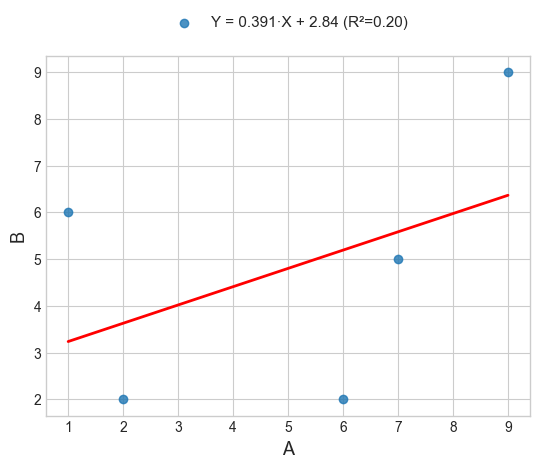

In [11]:
model = lm_stats_plot(df3, "A", "B")  